In [1]:
import pandas as pd
import numpy as np
import nltk

In [3]:
df=pd.read_csv('/content/spam (1).csv',encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.rename(columns={'v1':'class','v2':'sms'},inplace=True)

In [13]:
df.sample(5)

,class,sms
978,ham,Hey you can pay. With salary de. Only &lt;#&g...
5063,ham,I dunno lei... Like dun haf...
921,ham,On ma way to school. Can you pls send me ashle...
2843,ham,Today iZ Yellow rose day. If u love my frndshi...
700,ham,How much r Ì_ willing to pay?


In [15]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [16]:
df = df.drop_duplicates(keep='first')

In [17]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516  Go until jurong point, crazy.. Available only ...    1
spam    653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

Data Visualization

In [18]:
df["Length"] = df["sms"].apply(len)

<ipython-input-18-6593e74a92d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Length"] = df["sms"].apply(len)


In [19]:
df.head()

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

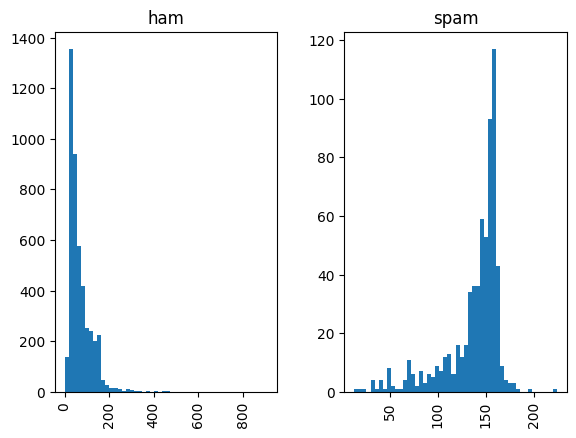

In [20]:
df.hist(column='Length',by='class',bins=50)

Preprocessing

In [21]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')

ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [22]:
df.head()

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Preprocessin Tasks:
1.Lower case
2.Tokenization
3.Removing special characters
4.Removing stopwards and punctuation
5.Stemming

In [30]:
import string

def clean_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

      text = y[:]
    y.clear()

    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)

        text = y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i))

    return " ".join(y)


In [31]:
df['sms_cleaned'] = df['sms'].apply(clean_text)

<ipython-input-31-c7d534ff2b56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sms_cleaned'] = df['sms'].apply(clean_text)


In [32]:
df.head()

,class,sms,Length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go
1,ham,Ok lar... Joking wif u oni...,29,ok
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free
3,ham,U dun say so early hor... U c already then say...,49,u
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah


Feature Extraction

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer(max_features=3000)
x= tf_vec.fit_transform(df['sms_cleaned']).toarray()


In [35]:
x.shape

(5169, 1703)

In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,df['class'],test_size=0.2,random_state=2)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,df['class'],test_size=0.2,random_state=2)

In [40]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9061895551257253
